# Final Project Machine Learning


## Member
### Trương Gia Bảo - 521H0201
### Vi Thành Đạt - 521H0390

## Import Library

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Infomation

In [91]:
data = pd.read_csv("googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [92]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [93]:
data.duplicated().sum()

483

In [94]:
# checking for null values
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [95]:
data.shape

(10841, 13)

# Data Preprocessing

In [96]:
# Removing irrelevant features
data = data.drop(['App','Last Updated','Current Ver','Android Ver'],axis='columns')
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


In [97]:
# Handling missing values
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
data['Type'].fillna('Free', inplace=True)

# Preprocessing Rating column
data['Rating'] = data['Rating'].astype(float)

# Preprocessing Type column
data['Type'] = data['Type'].apply(lambda x: 1 if x == 'Paid' else 0)

In [98]:
data[~data.Reviews.str.isnumeric()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [99]:
data=data.drop(data.index[10472])

In [100]:
# drop duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [101]:
# checking for null values
data.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [102]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [103]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [104]:
data['Reviews'] = data['Reviews'].astype(int)  # Convert 'Reviews' column to integer type
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else str(x))  # Remove 'M' from 'Size' column
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else str(x))  # Remove 'k' from 'Size' column
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))  # Remove '+' from 'Installs' column

data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.100000,159,19,"10,000",0,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.900000,967,14,"500,000",0,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.700000,87510,8.7,"5,000,000",0,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.500000,215644,25,"50,000,000",0,0,Teen,Art & Design
4,ART_AND_DESIGN,4.300000,967,2.8,"100,000",0,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.500000,38,53,"5,000",0,0,Everyone,Education
10837,FAMILY,5.000000,4,3.6,100,0,0,Everyone,Education
10838,MEDICAL,4.193338,3,9.5,"1,000",0,0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000",0,0,Mature 17+,Books & Reference


# Plot

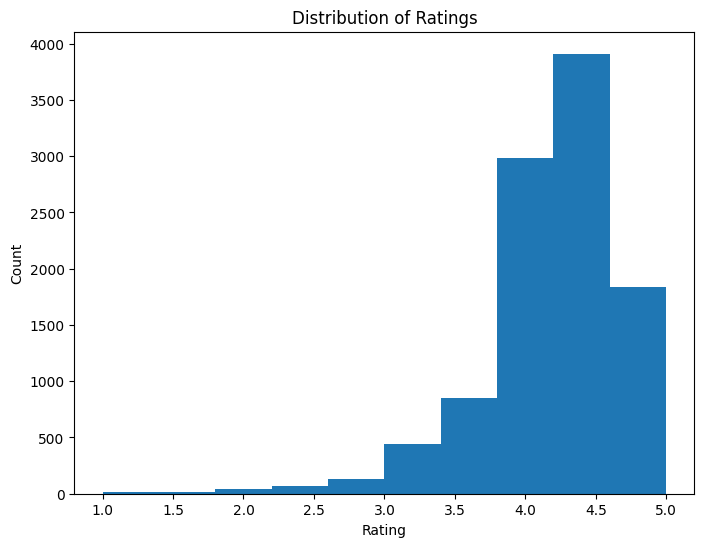

In [105]:
plt.figure(figsize=(8, 6))
plt.hist((data['Rating']), bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

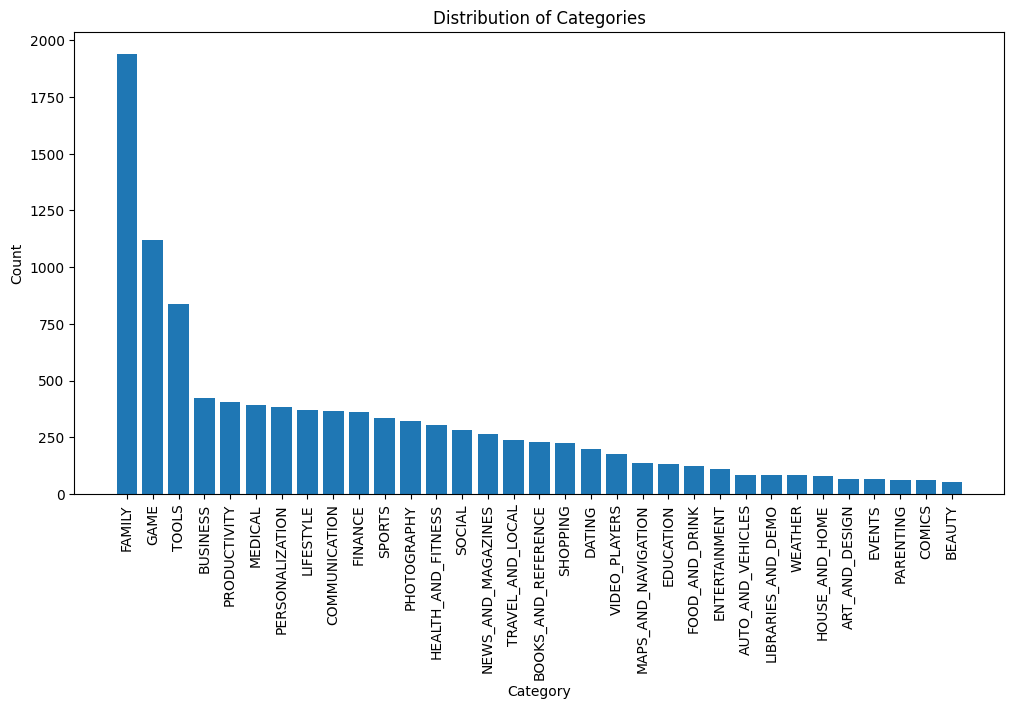

In [106]:
plt.figure(figsize=(12, 6))
category_counts = data['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()

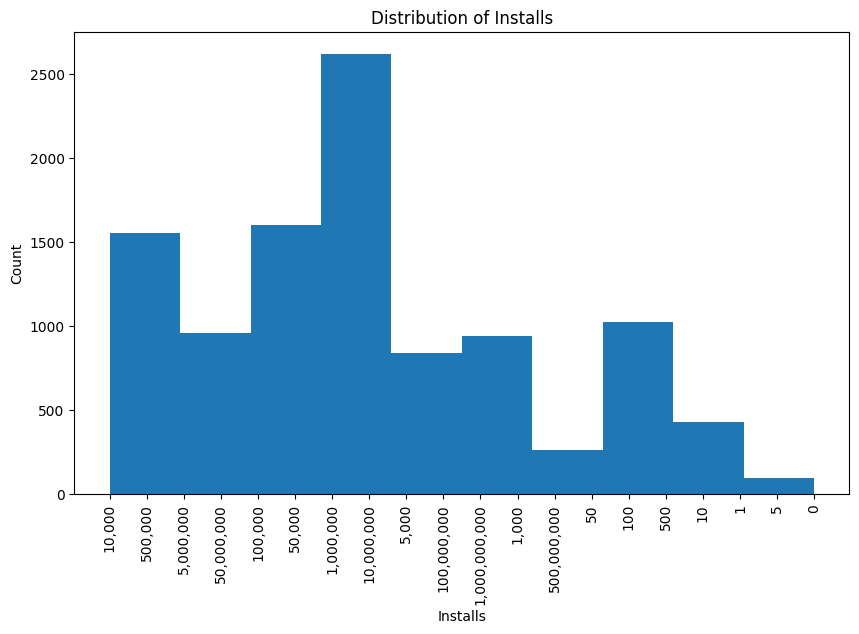

In [107]:
plt.figure(figsize=(10, 6))
plt.hist(data['Installs'].dropna(), bins=10)
plt.xlabel('Installs')
plt.ylabel('Count')
plt.title('Distribution of Installs')
plt.xticks(rotation=90)
plt.show()

# Model Machine Learning

In [108]:
X = data[['Category','Reviews', 'Size', 'Installs', 'Price', 'Type', 'Content Rating', 'Genres']]
y = data['Rating']

# Perform label encoding if there are categorical features
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X.loc[:, col] = label_encoder.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [109]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [110]:
linear_reg_pred = linear_reg.predict(X_test_scaled)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
print("Linear Regression MAE:", linear_reg_mae)
print("Linear Regression MSE:", linear_reg_mse)

Linear Regression MAE: 0.3132314434484071
Linear Regression MSE: 0.21966752658250407


# KNN

In [ ]:
# K-Nearest Neighbors
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
knn_reg_pred = knn_reg.predict(X_test_scaled)
knn_reg_mae = mean_absolute_error(y_test, knn_reg_pred)
knn_reg_mse = mean_squared_error(y_test, knn_reg_pred)
print("KNN Regression MAE:", knn_reg_mae)
print("KNN Regression MSE:", knn_reg_mse)

KNN Regression MAE: 0.3468684683710304
KNN Regression MSE: 0.25328034526291726


# Decision Tree

In [ ]:
# Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [ ]:
dt_reg_pred = dt_reg.predict(X_test_scaled)
dt_reg_mae = mean_absolute_error(y_test, dt_reg_pred)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
print("Decision Tree Regression MAE:", dt_reg_mae)
print("Decision Tree Regression MSE:", dt_reg_mse)

Decision Tree Regression MAE: 0.41744776470940476
Decision Tree Regression MSE: 0.4521018218157158


# Random Forest

In [ ]:
# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
rf_reg_pred = rf_reg.predict(X_test_scaled)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
print("Random Forest Regression MAE:", rf_reg_mae)
print("Random Forest Regression MSE:", rf_reg_mse)

Random Forest Regression MAE: 0.30092965427560026
Random Forest Regression MSE: 0.21350546880792037


# Gradient Boosting

In [ ]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

# Feed Forward Neural Network

In [ ]:
# Predict the target variable for the test set
gb_reg_pred = gb_reg.predict(X_test_scaled)

# Evaluate the model
gb_reg_mae = mean_absolute_error(y_test, gb_reg_pred)
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)

print("Gradient Boosting Regression MAE:", gb_reg_mae)
print("Gradient Boosting Regression MSE:", gb_reg_mse)

Gradient Boosting Regression MAE: 0.297242857181401
Gradient Boosting Regression MSE: 0.19949913277902379


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Xây dựng mô hình
model_ffnn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(1)
])

# Biên dịch mô hình
model_ffnn.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history_ffnn = model_ffnn.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Đánh giá mô hình trên dữ liệu kiểm tra
mse_ffnn = model_ffnn.evaluate(X_test_scaled, y_test)

Epoch 1/20
206/206 [==============================] - 1s 3ms/step - loss: 4.0386 - val_loss: 0.6090
Epoch 2/20
206/206 [==============================] - 1s 3ms/step - loss: 0.4920 - val_loss: 0.3914
Epoch 3/20
206/206 [==============================] - 1s 2ms/step - loss: 0.3669 - val_loss: 0.3177
Epoch 4/20
206/206 [==============================] - 0s 2ms/step - loss: 0.3117 - val_loss: 0.2760
Epoch 5/20
206/206 [==============================] - 1s 3ms/step - loss: 0.2821 - val_loss: 0.2528
Epoch 6/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2647 - val_loss: 0.2394
Epoch 7/20
206/206 [==============================] - 1s 3ms/step - loss: 0.2542 - val_loss: 0.2372
Epoch 8/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2484 - val_loss: 0.2249
Epoch 9/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2450 - val_loss: 0.2264
Epoch 10/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2433 - val_loss: 0.2219

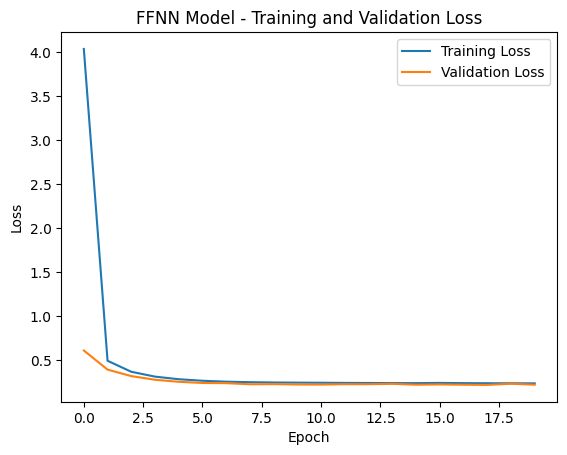

In [ ]:
# Plot training and validation loss
plt.plot(history_ffnn.history['loss'], label='Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.title('FFNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Reccurent Neural Network 

In [ ]:
# Chuyển đổi dữ liệu thành dạng chuỗi thời gian
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Xây dựng mô hình
model_rnn = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    keras.layers.Dense(1)
])

# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs= 20, batch_size=32, validation_split=0.2)

# Đánh giá mô hình trên dữ liệu kiểm tra
mse_rnn = model_rnn.evaluate(X_test_rnn, y_test)

Epoch 1/20
206/206 [==============================] - 2s 3ms/step - loss: 7.0109 - val_loss: 0.9174
Epoch 2/20
206/206 [==============================] - 0s 2ms/step - loss: 0.6576 - val_loss: 0.4969
Epoch 3/20
206/206 [==============================] - 0s 2ms/step - loss: 0.4444 - val_loss: 0.3764
Epoch 4/20
206/206 [==============================] - 0s 2ms/step - loss: 0.3572 - val_loss: 0.3162
Epoch 5/20
206/206 [==============================] - 0s 2ms/step - loss: 0.3129 - val_loss: 0.2851
Epoch 6/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2892 - val_loss: 0.2636
Epoch 7/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2738 - val_loss: 0.2512
Epoch 8/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2643 - val_loss: 0.2397
Epoch 9/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2567 - val_loss: 0.2346
Epoch 10/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2519 - val_loss: 0.2284

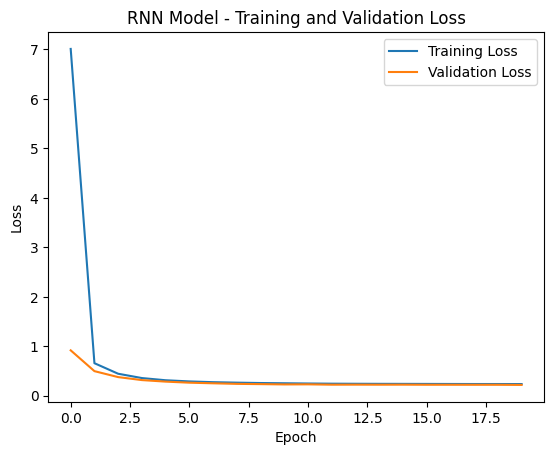

In [ ]:
# Plot training and validation loss
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()